In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

In [2]:
indx = 2 # 0 low growth rate, 1 for intermediate growth rate, 2 for high growth rate
model = 'LDDR' # other options 'LD' or 'LDDR' or 'Full_model'

In [6]:
file_path_input_params_json = '../../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'SI/S21_LD_LDDR_full_no_lipids/'+model
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/LDDR
parameter_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/LDDR/parameter_set.csv


# Make data frame from time traces

In [7]:
data_frame_0 = makeDataframe.make_dataframe(file_path)
# make data frame with oriC dependent lipids

data_frame = data_frame_0.loc[data_frame_0['activation_rate_lipids'] == 0].sort_values(by=['rate_growth'])

time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_init_events')
v_init_per_ori = v_init_data_frame.iloc[-1]['v_init_per_ori']
v_init = v_init_data_frame.iloc[-1]['v_init']
t_init_list = v_init_data_frame['t_init'].to_numpy()

v_d_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_div_events')
data_frame

['/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/LDDR/plot_rates_together.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/LDDR/Fig_SI_no_lipids_2_LDDR.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/LDDR/LDDR_no_lipids_optimized',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/LDDR/lddr-oric',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/LDDR/Fig_SI_no_lipids_0_LDDR.pdf']


,activation_rate_dars1,activation_rate_dars2,activation_rate_lipids,amplitude_oscillations,aspect_ratio,basal_rate_initiator,basal_rate_initiator_0,basal_rate_regulator,basal_rate_regulator_0,block_production,...,total_conc,underexpression_oscillations,v_0,v_init_th,verbose,version_of_coupled_division_regulation,version_of_independent_division_regulation,version_of_lipid_regulation,version_of_model,version_of_titration
0,10.0,10.0,0.0,30.0,4.0,519.860385,1500.0,24.260151,70.0,1,...,400.0,0,0.1,0.28,NaN,cooper,IDA,proteome_sector,switch,regulator_is_initiator
2,10.0,10.0,0.0,30.0,4.0,1782.378464,1500.0,83.177662,70.0,1,...,400.0,0,0.1,0.28,NaN,cooper,IDA,proteome_sector,switch,regulator_is_initiator
1,10.0,10.0,0.0,30.0,4.0,2495.329850,1500.0,116.448726,70.0,1,...,400.0,0,0.1,0.28,NaN,cooper,IDA,proteome_sector,switch,regulator_is_initiator


In [8]:
time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori = np.array(time_traces_data_frame["n_ori"])
active_fraction = np.array(time_traces_data_frame["active_fraction"])
print(time.size)
cycle_0 = 20
cycle_f = 23
t_0 = time[volume==v_d_data_frame['v_b'][cycle_0]]
indx_0 = np.where(time==t_0)[0][0]
t_f = time[volume==v_d_data_frame['v_b'][cycle_f]]
indx_f = np.where(time==t_f)[0][0]+10

print('indices cut:', indx_0, indx_f, indx_f-indx_0)

n_ori_cut = n_ori[indx_0:indx_f]
time_cut = time[indx_0:indx_f]
volume_cut = volume[indx_0:indx_f]
active_fraction_cut = active_fraction[indx_0:indx_f]

t_init_list_cut_1 = t_init_list[t_init_list>t_0]
t_init_list_cut = t_init_list_cut_1[t_init_list_cut_1<t_f]
t_b = t_init_list + data_frame.iloc[indx]['t_CD']
t_b_cut_1 = t_b[t_b<t_f]
t_b_cut = t_b_cut_1[t_b_cut_1>t_0]
print(t_init_list_cut, t_b_cut)

16667
indices cut: 10487 11748 1261
[10.736 11.153 11.57 ] [10.902 11.319 11.736]


# Lipid activation oriC-dependent

In [9]:
data_frame_oriC_lipids = data_frame_0.loc[data_frame_0['activation_rate_lipids'] != 0].sort_values(by=['rate_growth'])
# print(data_frame_oriC_lipids)
time_traces_oriC_data_frame = pd.read_hdf(data_frame_oriC_lipids['path_dataset'].iloc[indx], key='dataset_time_traces')
v_d_data_frame_oriC = pd.read_hdf(data_frame_oriC_lipids['path_dataset'].iloc[indx], key='dataset_div_events')

active_fraction_oriC = np.array(time_traces_oriC_data_frame["active_fraction"])
time_oriC = np.array(time_traces_oriC_data_frame["time"])
volume_oriC = np.array(time_traces_oriC_data_frame["volume"])
# print(time_oriC)

t_0_oriC = time_oriC[volume_oriC==v_d_data_frame_oriC['v_b'][cycle_0]]
indx_0_oriC = np.where(time_oriC==t_0_oriC)[0][0]
t_f_oriC = time_oriC[volume_oriC==v_d_data_frame_oriC['v_b'][cycle_f]]
indx_f_oriC = indx_0_oriC + indx_f-indx_0

print('indices cut: ', indx_0_oriC, indx_f_oriC, indx_f_oriC-indx_0_oriC)
active_fraction_cut_oriC = active_fraction_oriC[indx_0_oriC:indx_f_oriC]
time_cut_oriC = time_oriC[indx_0_oriC:indx_f_oriC]

data_frame_oriC_lipids

indices cut:  10591 11852 1261


,activation_rate_dars1,activation_rate_dars2,activation_rate_lipids,amplitude_oscillations,aspect_ratio,basal_rate_initiator,basal_rate_initiator_0,basal_rate_regulator,basal_rate_regulator_0,block_production,...,total_conc,underexpression_oscillations,v_0,v_init_th,verbose,version_of_coupled_division_regulation,version_of_independent_division_regulation,version_of_lipid_regulation,version_of_model,version_of_titration
3,10.0,10.0,100.0,0.0,4.0,138.629436,400.0,24.260151,70.0,1,...,400.0,0,0.1,0.28,1.0,cooper,IDA,proteome_sector,switch,regulator_is_initiator
5,10.0,10.0,100.0,0.0,4.0,475.300924,400.0,83.177662,70.0,1,...,400.0,0,0.1,0.28,1.0,cooper,IDA,proteome_sector,switch,regulator_is_initiator
4,10.0,10.0,100.0,0.0,4.0,665.421293,400.0,116.448726,70.0,1,...,400.0,0,0.1,0.28,1.0,cooper,IDA,proteome_sector,switch,regulator_is_initiator


# Color definitions

In [10]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

# Plot three figures

t_start: 3.791
0.4166666666666667
t_end: 4.219
indices: 3791 4219
t_start: 3.896
0.4166666666666667
t_end: 4.324
indices: 3896 4324
2.4


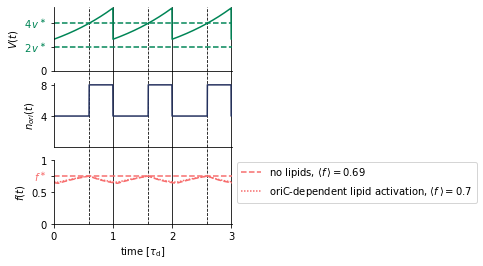

In [11]:
label_list = [r'$V(t)$', r'$n_{ori}(t)$', r'$f(t)$']
x_axes_list = [time_cut, time_cut, time_cut]
y_axes_list = [volume_cut, n_ori_cut, active_fraction_cut]
legend_bool_list = [0, 0, 1]
legend_list = [' ', ' ', r'no lipids, $\langle f \, \rangle = {}$'.format(np.round(dataAnalysis.calculate_average_active_fraction(data_frame, 3, indx), 2))]
legend_oriC_lipids =  r'oriC-dependent lipid activation, $\langle f \, \rangle = {}$'.format(np.round(dataAnalysis.calculate_average_active_fraction(data_frame_oriC_lipids, 3, indx), 2))
color_list = [green, dark_blue, pinkish_red]
fig, ax = plt.subplots(3, figsize=(3.2,4))
plt.xlabel(r'time [$\tau_{\rm d}$]')
y_min_list = [0,0,0,0]
y_max_list = [1, 1.2, 1.2, 1.2]

doubling_time = 1/data_frame.iloc[indx]['doubling_rate']
print(1/doubling_time)
for item in range(0, len(label_list)):
    ax[item].set_ylabel(label_list[item])
    if item == 2:
        ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item], label= legend_list[item], linestyle='dashed')
        ax[item].plot(time_cut, active_fraction_cut_oriC, color=color_list[item], label= legend_oriC_lipids, linestyle=(0, (1, 1)))
        ax[item].legend(bbox_to_anchor=(1, 1.05))
    else:
        ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item])
#     if legend_bool_list[item] == 1:
#         ax[item].annotate(legend_list[item],xy=(148.5, 55), xycoords='axes points', ha='center', va='bottom', 
#             bbox=dict(boxstyle='round', lw=0.7, fc='w',pad=0.3, color=pinkish_red), color=pinkish_red)
    ax[item].set_ylim(ymin=0)
    ax[item].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax[item].spines["top"].set_visible(False)
    ax[item].spines["right"].set_visible(False)
    ax[item].margins(0)
    for t_div in t_b_cut:
        ax[item].axvline(x=t_div, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          clip_on=False)
    for t_init in t_init_list_cut:
        ax[item].axvline(x=t_init, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          linestyle='--',
                          clip_on=False)
if indx==0:
    ax[0].set_yticks([0, v_init_per_ori])
    ax[0].set_yticklabels(['0',r'$v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].axhline(y=v_init_per_ori, color=green, linestyle='--')
    
if indx==1:
    ax[0].set_yticks([0, v_init_per_ori, 2*v_init_per_ori])
    ax[0].set_yticklabels(['0',r'$v^\ast$',r'$2 \, v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].get_yticklabels()[2].set_color(green)
    ax[0].axhline(y=v_init, color=green, linestyle='--')
    ax[0].axhline(y=2 * v_init_per_ori, color=green, linestyle='--')
    
if indx==2:
    ax[0].set_yticks([0, 2 * v_init_per_ori, 4*v_init_per_ori])
    ax[0].set_yticklabels(['0',r'$2 \, v^\ast$',r'$4 \, v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].get_yticklabels()[2].set_color(green)
    ax[0].axhline(y=2 * v_init_per_ori, color=green, linestyle='--')
    ax[0].axhline(y=4 * v_init_per_ori, color=green, linestyle='--')
# ax[0].axhline(y=0.5 * v_init, color=green, linestyle='--')
if indx==0:
    ax[1].set_yticks([1, 2])
    ax[1].set_yticklabels([r'1',r'2'])
if indx==1:
    ax[1].set_yticks([2, 4])
    ax[1].set_yticklabels([r'2',r'4'])   
if indx==2:
    ax[1].set_yticks([4, 8])
    ax[1].set_yticklabels([r'4',r'8'])   
    
# ax[2].lines[0].set_linestyle((0, (1, 1)))
ax[2].axhline(y=data_frame.iloc[0]['frac_init'], color=pinkish_red, linestyle='--')
ax[2].set_yticks([0, 0.5, data_frame.iloc[0]['frac_init'], 1])
ax[2].set_yticklabels(['0', '0.5', r'$f^\ast$', '1'])
ax[2].get_yticklabels()[2].set_color(pinkish_red)
ax[2].tick_params(bottom=True, labelbottom=True)
ax[2].tick_params(axis='x', colors='black')
ax[2].set_xticks([time_cut[0], 
                  time_cut[0]+ doubling_time, 
                  time_cut[0]+ 2*doubling_time,
                  time_cut[0]+ 3*doubling_time
                 ])
ax[2].set_xticklabels(['0', '1', '2', '3'])
# ax[0].set_title(r'growth rate $\tau_{{\rm d}}=$ {}'.format(np.round(1/data_frame.iloc[indx]['doubling_rate'],2)))
plt.savefig(file_path + '/Fig_SI_no_lipids_'+str(indx)+'_'+ model+'.pdf', format='pdf',bbox_inches='tight')

# Rates plotted together

In [12]:
def deactivation_datA(concentrations, data_frame, origin_density):
    return (data_frame["deactivation_rate_datA"].iloc[indx]) * origin_density * concentrations / (data_frame["michaelis_const_destr"].iloc[indx] + concentrations)

def v_init_th(data_frame):
    KD= data_frame["michaelis_const_destr"].iloc[indx]/ data_frame["total_conc"].iloc[indx]
    print('KD:', KD)
    frac_init = data_frame["frac_init"].iloc[indx]
    growth_rate =  data_frame['doubling_rate'].iloc[indx] * np.log(2)
    print('datA rate:', data_frame["deactivation_rate_datA"].iloc[indx])
    return (data_frame["deactivation_rate_datA"].iloc[indx]/ total_conc * frac_init)/((KD + frac_init) * growth_rate * (1-frac_init))

In [13]:
n_time_steps = 6
total_conc = data_frame['total_conc'].iloc[indx]
doubling_rate = data_frame['doubling_rate'].iloc[indx]
growth_rate = np.log(2) * doubling_rate
concentrations = np.arange(0, total_conc, 0.01)
list_concentrations = [concentrations for i in range(n_time_steps)]
list_fractions = [concentrations/total_conc for i in range(n_time_steps)]
times = np.linspace(0, n_time_steps, n_time_steps)/n_time_steps / doubling_rate
print('times: ', times)
print(v_init_th(data_frame))
origin_densities = np.linspace(2/v_init_th(data_frame), 1/v_init_th(data_frame), n_time_steps)
list_activation_rates_normalized = [growth_rate * (total_conc-concentrations)/total_conc for i in range(n_time_steps)]
list_deactivation_rates_normalized = [deactivation_datA(concentrations, data_frame, origin_densities[i])/total_conc for i in range(n_time_steps)]

times:  [0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667]
KD: 0.125
datA rate: 20.0
0.10304964577778312
KD: 0.125
datA rate: 20.0
KD: 0.125
datA rate: 20.0


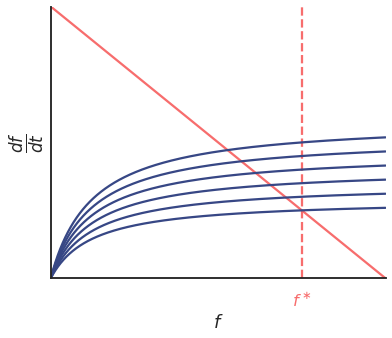

In [14]:
sns.set(style="white")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,5))
plt.tick_params(
    which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
    left = False,
    top=False,         # ticks along the top edge are off
#     labelbottom=False, # labels along the bottom edge are off  
    labelleft=False)  # labels along the left edge are off
ax.plot(list_fractions[0], list_activation_rates_normalized[0], color= pinkish_red)
for item in range(0, n_time_steps):
    ax.plot(list_fractions[item], list_deactivation_rates_normalized[item], color= blue)
# ax.axhline(y=conc_init, xmin=0, xmax=v_max, color='r', linestyle='--', lw=2, label=r'$[D]_{\rm ATP}^\ast$')
# ax.set(xlabel=r'$f$', ylabel=r'$\frac{df}{dt}$')
plt.xlabel(r'$f$', fontsize=18)
plt.ylabel(r'$\frac{df}{dt}$', fontsize=24)
ax.vlines(data_frame["frac_init"].iloc[indx], 0, list_activation_rates_normalized[0][0], color= pinkish_red, linestyle='--')
ax.set_xticks([data_frame["frac_init"].iloc[indx]])
ax.set_xticklabels([r'$ f^\ast$'])
ax.get_xticklabels()[0].set_color(pinkish_red)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(0)
plt.savefig(file_path + '/plot_rates_together.pdf', format='pdf', bbox_inches='tight')